### Problem Statement:

The data scientists at BigMart have gathered sales information from 2013 for 1559 products from 10 stores located in various cities. Additionally, each product's and shop's specific characteristics have been described. The objective is to create a prediction model and learn how much of each product sells in a specific store.

With the aid of this model, BigMart will attempt to comprehend the qualities of the merchandise and the establishments that are crucial to boosting sales.

### Hypothesis Generation:

I came up with the following hypothesis while thinking about the problem.
- Hypothesis1: Higher product visibility leads to higher sales.
- Hypothesis2: Urban stores have higher sales compared to rural stores.
- Hypothesis3: Increased marketing expenditure is positively associated with sales.
- Hypothesis4: Established brand names result in higher sales.
- Hypothesis5: Store size is positively correlated with sales.
- Hypothesis6: Seasonal factors impact sales, with higher sales during holidays.
- Hypothesis7: Higher-priced products have lower sales quantity but potentially higher sales value.

### Loading Packages and Data:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas_profiling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import xgboost as xgb
from sklearn.linear_model import Ridge
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

C:\Users\firda\AppData\Local\Temp\ipykernel_3100\3387760365.py:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [2]:
train = pd.read_csv('train.csv')


### Data Structure and Content : 

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Exploratory Data Analysis

In [4]:
profile = train.profile_report(title='Train Data Profile Report')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Missing Value Treatment: 

In [5]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

we will replace the missing values in Item_Weight with the mean():

In [6]:
train['Item_Weight']=train['Item_Weight'].fillna(train['Item_Weight'].mean())

we will replace the missing values in Outlet_Size with the mode():

In [7]:
train['Outlet_Size']=train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

checking whether we still have missing values

In [8]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [16]:
!pip install seaborn
!pip install matplotlib


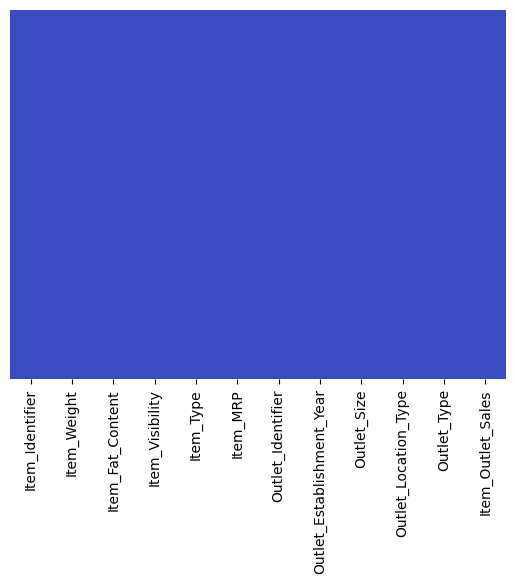

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Generate the heatmap plot
ax = sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='coolwarm')

# Display the plot
plt.show()

## Univariate Analysis :

###      Categorical variables :

- ### Visualizing the "Outlet_Identifier":

<Axes: >

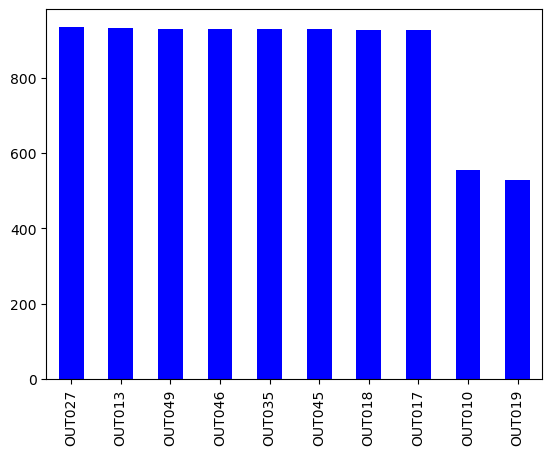

In [13]:

train['Outlet_Identifier'].value_counts().plot(kind='bar',color = 'blue')

all the categories of the "Outlet_Identifier" column have the same number of counts, and there is no additional information or differentiation provided by this column, it may be reasonable to consider dropping the column.

In [14]:
train = train.drop(['Item_Identifier','Outlet_Identifier'],axis=1)

In [15]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


- ### Visualizing the "Item_Fat_Content":

<Axes: >

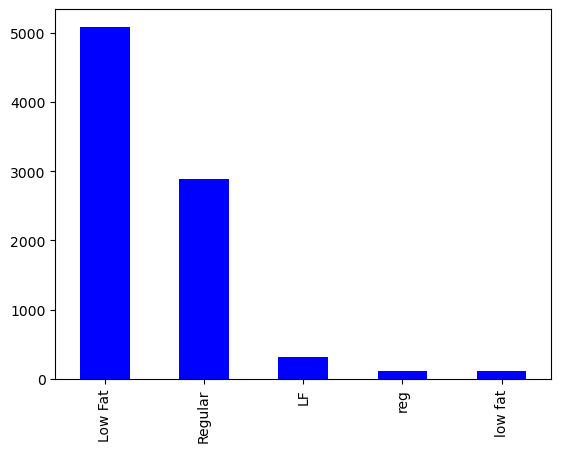

In [16]:
train['Item_Fat_Content'].value_counts().plot(kind='bar',color = 'blue')

some categories don"t make sense and should be corrected 

In [17]:
train =  train.replace(to_replace ="low fat",  value ="Low Fat") 
train =  train.replace(to_replace ="LF",  value ="Low Fat") 
train =  train.replace(to_replace ="reg",  value ="Regular") 

<Axes: >

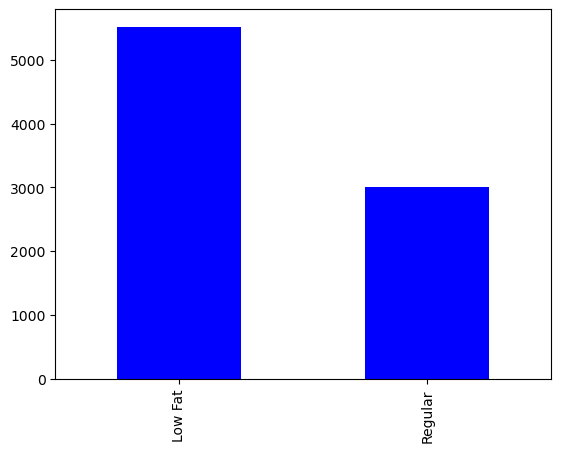

In [18]:
train['Item_Fat_Content'].value_counts().plot(kind='bar',color = 'blue')

- ### Visualizing the "Item_type":

<Axes: >

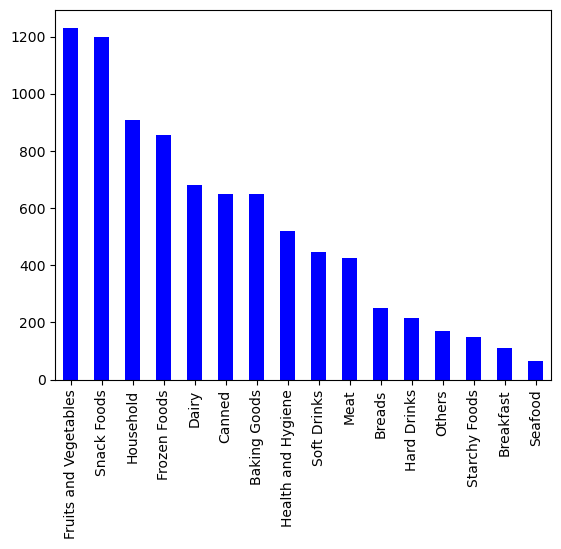

In [19]:
train['Item_Type'].value_counts().plot(kind='bar',color = 'blue')

- ### Visualizing the "Outlet_Size":

<Axes: >

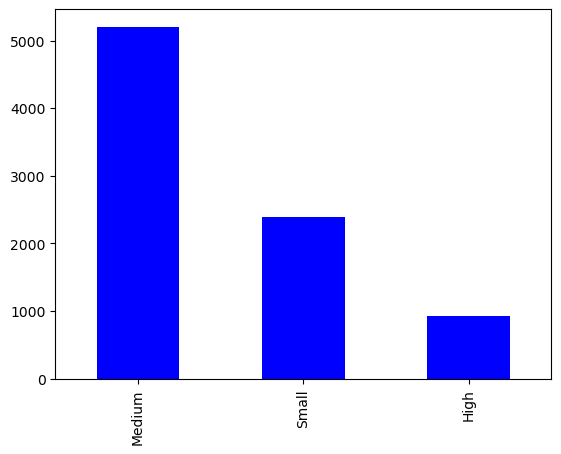

In [20]:
train['Outlet_Size'].value_counts().plot(kind='bar',color = 'blue')

- ### Visualizing the "Outlet_Location_Type":

<Axes: >

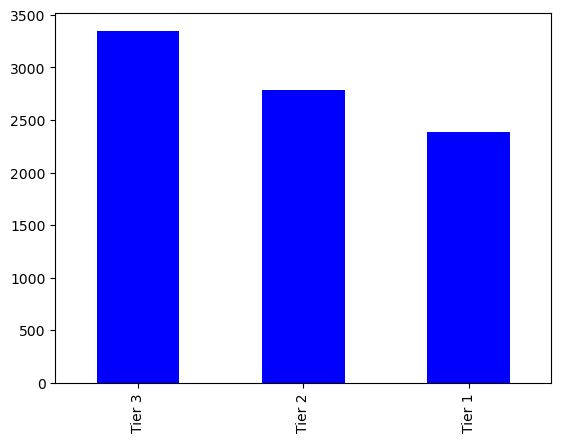

In [21]:
train['Outlet_Location_Type'].value_counts().plot(kind='bar',color = 'blue')

- ### Visualizing the "Outlet_Type":

<Axes: >

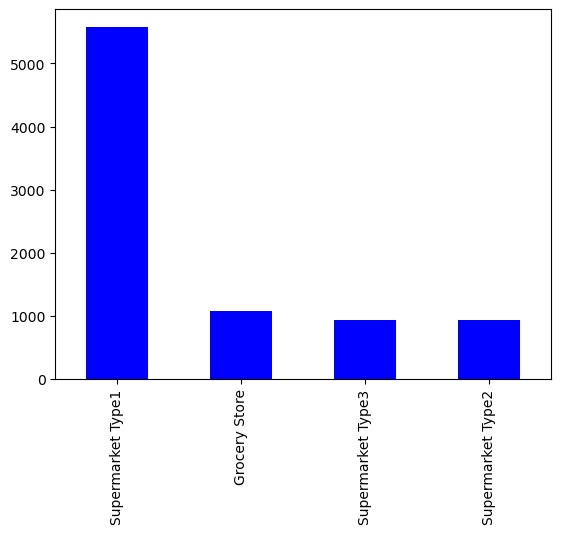

In [22]:
train['Outlet_Type'].value_counts().plot(kind='bar',color = 'blue')

## Numerical Variables :

- ### Item_Weight : 

<Axes: xlabel='Item_Weight', ylabel='Count'>

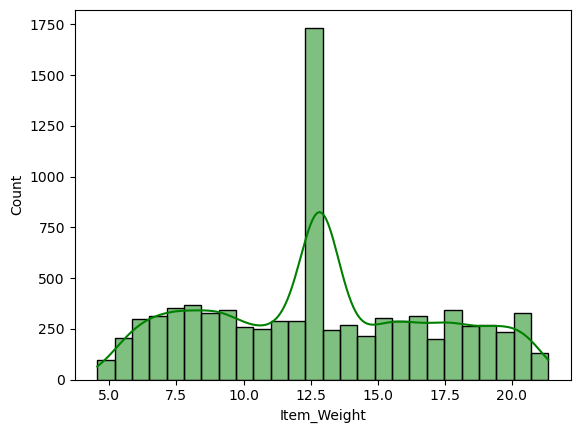

In [23]:
y = train['Item_Weight']
plt.figure(1); 
sns.histplot(y, kde=True, color='green')

- ### Item_Visibility : 

C:\Users\firda\AppData\Local\Temp\ipykernel_3100\190251513.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, kde=True,color = 'green')


<Axes: xlabel='Item_Visibility', ylabel='Density'>

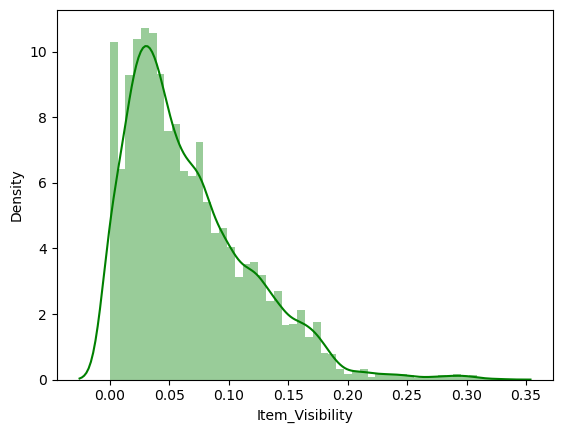

In [24]:
y = train['Item_Visibility']
plt.figure(1); 
sns.distplot(y, kde=True,color = 'green')

- ### Item_MRP : 

C:\Users\firda\AppData\Local\Temp\ipykernel_3100\1236158879.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, kde=True,color = 'green')


<Axes: xlabel='Item_MRP', ylabel='Density'>

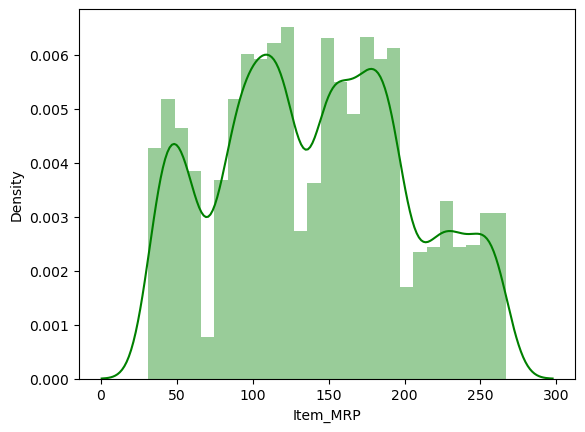

In [25]:
y = train['Item_MRP']
plt.figure(1); 
sns.distplot(y, kde=True,color = 'green')

- ### Outlet_Establishment_Year: 

C:\Users\firda\AppData\Local\Temp\ipykernel_3100\213846164.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, kde=True,color = 'green')


<Axes: xlabel='Outlet_Establishment_Year', ylabel='Density'>

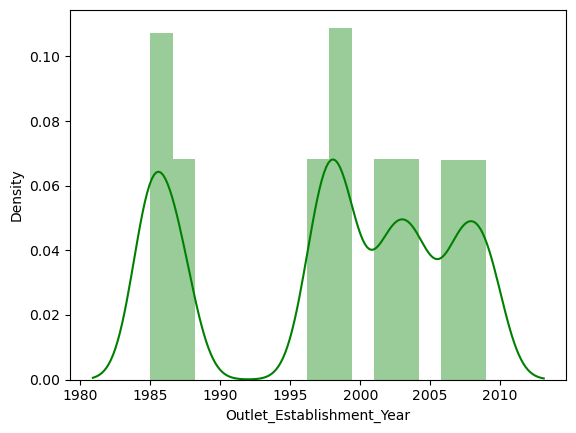

In [26]:

y = train['Outlet_Establishment_Year']
plt.figure(1); 
sns.distplot(y, kde=True,color = 'green')

- ### Item_Outlet_Sales :

C:\Users\firda\AppData\Local\Temp\ipykernel_3100\3918708694.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, kde=True,color = 'green')


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

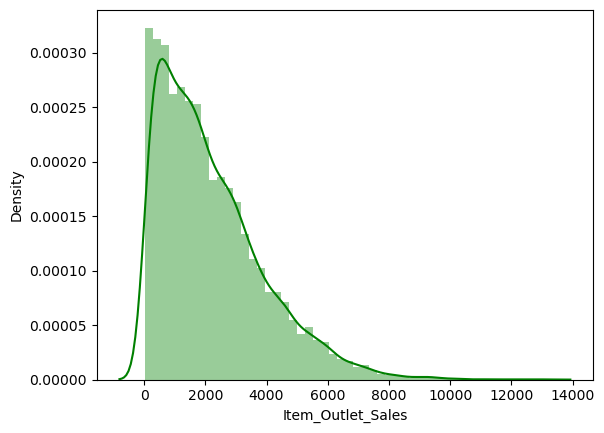

In [27]:
y = train['Item_Outlet_Sales']
plt.figure(1); 
sns.distplot(y, kde=True,color = 'green')

## Feature Engineering:

 I decide introducing a new feature "Qty_Sold" that captures the quantity sold per unit price, which can potentially improve the analysis or predictive performance of our model.

In [28]:
train["Qty_Sold"] = (train["Item_Outlet_Sales"]/train["Item_MRP"])
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Qty_Sold
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14.951963
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,9.186454
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14.809346
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800,4.021967
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,18.467868


## Bivariate Analysis: 

C:\Users\firda\AppData\Local\Temp\ipykernel_3100\1860371559.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),annot=True,cmap="YlGnBu")


<Axes: >

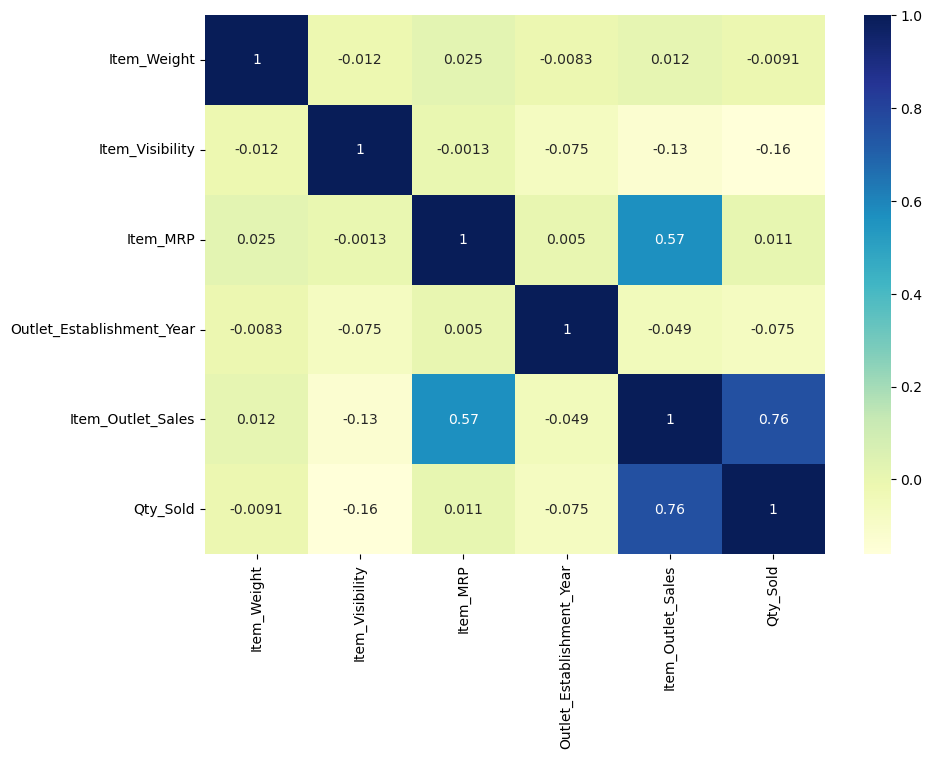

In [29]:
plt.figure(figsize=(10,7))
sns.heatmap(train.corr(),annot=True,cmap="YlGnBu")

## Label Encoding: 


In [38]:
#Encoding Categorical Variables
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in train.columns:
    train[col] = labelencoder.fit_transform(train[col])


## One hot encoding : 

In [39]:
train=pd.get_dummies(train, columns=['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type'],drop_first=False)

print(train.shape)

(8523, 34)


In [40]:
train.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Qty_Sold',
       'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Item_Type_0',
       'Item_Type_1', 'Item_Type_2', 'Item_Type_3', 'Item_Type_4',
       'Item_Type_5', 'Item_Type_6', 'Item_Type_7', 'Item_Type_8',
       'Item_Type_9', 'Item_Type_10', 'Item_Type_11', 'Item_Type_12',
       'Item_Type_13', 'Item_Type_14', 'Item_Type_15', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Type_0',
       'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3'],
      dtype='object')

In [ ]:
train.head()

In [41]:
df = train[['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year',
       'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Item_Type_0',
       'Item_Type_1', 'Item_Type_2', 'Item_Type_3', 'Item_Type_4',
       'Item_Type_5', 'Item_Type_6', 'Item_Type_7', 'Item_Type_8',
       'Item_Type_9', 'Item_Type_10', 'Item_Type_11', 'Item_Type_12',
       'Item_Type_13', 'Item_Type_14', 'Item_Type_15', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Type_0',
       'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3', 'Item_Outlet_Sales', 'Qty_Sold']]
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_0,Item_Fat_Content_1,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,...,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Outlet_Sales,Qty_Sold
0,284,664,5592,4,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,2540,4084
1,57,880,473,8,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,422,2217
2,376,715,2901,4,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1639,3972
3,393,0,4227,3,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,670,1119
4,265,0,627,1,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,865,5315


### Separating features and label

In [42]:
X = train.iloc[:,0:33].values
y = train.iloc[:,-1].values

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

### StandardScaler:

In [44]:
# Create a StandardScaler object
scaler = StandardScaler()

# Apply standard scaling to your feature matrix X
X = scaler.fit_transform(X)

In [45]:
# df to store model error and scores
model_scores = pd.DataFrame(columns=['model', 'rmse', 'r2_score'])

### Modeling :

In [46]:
from sklearn.pipeline import make_pipeline
def train_and_evaluate_model(model_name, model, X, y):
    # split the data
    X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # create a training pipeline
    pipeline = make_pipeline(StandardScaler(), model)
    
    # apply scaling on training data and train the model
    pipeline.fit(X_train, y_train)
    
    # predict the validation set
    y_hat = pipeline.predict(X_validate)
    
    # evaluate the model
    rmse = np.sqrt(mean_squared_error(y_validate, y_hat))
    model_score = r2_score(y_validate, y_hat)
    
    # adding error and score, to the scores datafrane
    model_scores.loc[len(model_scores)] = [model_name, rmse, model_score]
    
    print('----------------------------------')
    print(model_name, ' Report:')
    print('----------------------------------')
    print('RMSE: ', rmse)
    print('R2 Score: ', model_score)

In [47]:
# linear regression
linear_regression_model = LinearRegression()
train_and_evaluate_model('Linear Regression', linear_regression_model, X, y)

----------------------------------
Linear Regression  Report:
----------------------------------
RMSE:  6.851162363519179e-16
R2 Score:  1.0


In [48]:
ridge_model = Ridge()
train_and_evaluate_model('Ridge', ridge_model, X, y)

----------------------------------
Ridge  Report:
----------------------------------
RMSE:  0.0006892873200517782
R2 Score:  0.9999948152847857


In [49]:
rfr_model = RandomForestRegressor()
train_and_evaluate_model('Random Forest', rfr_model, X, y)

----------------------------------
Random Forest  Report:
----------------------------------
RMSE:  0.0
R2 Score:  1.0


In [50]:
# xgboost
xgbr_model = XGBRegressor()
train_and_evaluate_model('XGBoost', xgbr_model, X, y)

----------------------------------
XGBoost  Report:
----------------------------------
RMSE:  1.4064083e-05
R2 Score:  0.999999997841524


In [54]:
model_scores

,model,rmse,r2_score
0,Linear Regression,6.851162e-16,1.000000
1,Ridge,6.892873e-04,0.999995
2,Random Forest,0.000000e+00,1.000000
3,XGBoost,1.406408e-05,1.000000


Based on the model score table, the model that best fits this problem that presents the lowest RMSE and highest Score is Linear Regression.

### Hyperparameter Tuning for XGBoost (XGB)

In [55]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid for hyperparameter tuning
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7]
}

# Create an XGBRegressor object
xgb = XGBRegressor()

# Perform GridSearchCV for hyperparameter tuning
grid_search_xgb = GridSearchCV(xgb, param_grid=param_grid_xgb, cv=5)
grid_search_xgb.fit(X, y)

# Get the best hyperparameters and model
best_params_xgb = grid_search_xgb.best_params_
best_model_xgb = grid_search_xgb.best_estimator_

In [56]:

train_and_evaluate_model('XGBoost', best_model_xgb, X, y)

----------------------------------
XGBoost  Report:
----------------------------------
RMSE:  1.5049381e-05
R2 Score:  0.9999999975284947


### Hyperparameter Tuning for Gradient Boosting Regressor (GBR):

In [57]:
# Define the parameter grid for hyperparameter tuning
param_grid_gbr = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7]
}

# Create a GradientBoostingRegressor object
gbr = GradientBoostingRegressor()

# Perform GridSearchCV for hyperparameter tuning
grid_search_gbr = GridSearchCV(gbr, param_grid=param_grid_gbr, cv=5)
grid_search_gbr.fit(X, y)



GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]})

In [58]:
# Get the best hyperparameters and model
best_params_gbr = grid_search_gbr.best_params_
best_model_gbr = grid_search_gbr.best_estimator_
train_and_evaluate_model('GBR', best_model_gbr, X, y)

----------------------------------
GBR  Report:
----------------------------------
RMSE:  1.3010634407062322e-08
R2 Score:  0.9999999999999981


This mini project aimed to build a predictive model to understand and improve sales of 1559 products across 10 stores. We followed a structured approach, performing exploratory data analysis, handling missing values, feature engineering, and encoding categorical variables. Various models were evaluated, including linear regression, regularized linear regression, RandomForest, and XGBoost. The best-performing model "linear regression" can be used to predict sales and identify factors that contribute to increased sales. This project highlights the importance of data analysis and predictive modeling for business success.